# Assignment 8,9

Rosa Kurtz

### 1) Fourier Series and Discrete Fourier Transforms

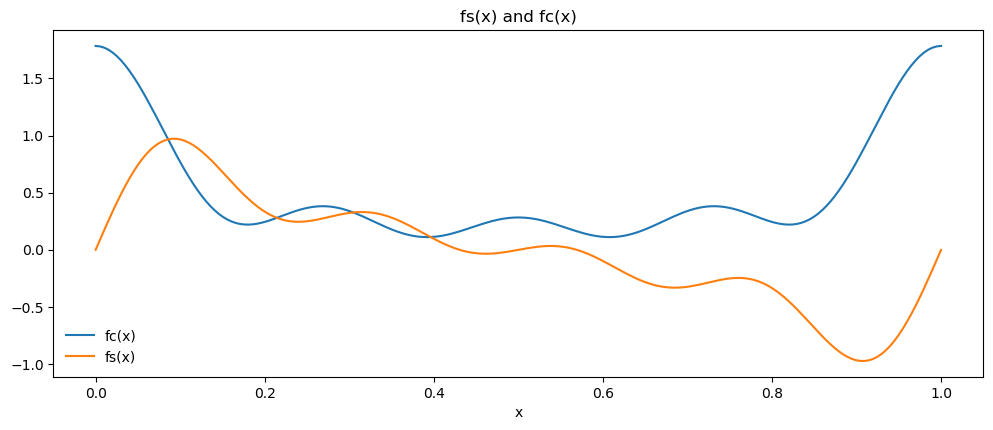

In [185]:
# a) finite fourier series and plot

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, pi, sqrt, sum, cos, sin

# SciPy
import scipy.fftpack as fft

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon']   = False

# Functions

L=1
N=4

def Fc(x):
    fc=0
    for n in range(1,N+1):
        fc=(1/(1+n))*cos((2*pi*n*x)/L)+fc
    fc=fc+(1/2)
    return fc

def Fs(x):
    fs=0
    for n in range(1,N+1):
        fs=(1/(1+n))*sin((2*pi*n*x)/L)+fs
    return fs




# Plot
xp = np.linspace(0,L,200)
C=Fc(xp)
S=Fs(xp)

plt.figure(figsize=(12,4.5),dpi=100)
plt.plot(xp, C, label='fc(x)')
plt.plot(xp, S, label='fs(x)')
plt.xlabel('x')
plt.title('fs(x) and fc(x)')
plt.legend()
plt.show()

In [2]:
#b)# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, pi, sqrt, sum, cos, sin

# SciPy
import scipy.fftpack as fft

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon']   = False

# Functions

L=1
N=4

def Fc(x):
    fc=0
    for n in range(1,N+1):
        fc=(1/(1+n))*cos((2*pi*n*x)/L)+fc
    fc=fc+(1/2)
    return fc

def Fs(x):
    fs=0
    for n in range(1,N+1):
        fs=(1/(1+n))*sin((2*pi*n*x)/L)+fs
    return fs

Nx=12
Nk=Nx
x = np.linspace(0,L,Nx,endpoint=False)
k = np.linspace(0,Nk,Nk,endpoint=False)


kx=np.linspace(0,L,Nk,endpoint=False)
for v in range(0,Nk):
    if(v <= int(Nk/2)):
        kx[v]=((2*pi)/L)*k[v]
    if(v > int(Nk/2)):
        kx[v]=((2*pi)/L)*(k[v]-Nk)
    


C=Fc(x)
S=Fs(x)
C_real=Fc(x).real
S_real=Fs(x).real

print("fc(x):")
print(" ")
print("gk(x):",np.around(fft.fft(C),5))
print(" ")
print("amplitudes gk(x):",np.around(C_real,3))
print(" ")
print("k values:",np.around(k,3))
print(" ")
print("kx values:",np.around(kx,3))


print("\n")

print("fs(x):")
print(" ")
print("gk(x):",np.around(fft.fft(S),5))
print(" ")
print("amplitudes gk(x):",np.around(S_real,3))
print(" ")
print("k values:",np.around(k,3))
print(" ")
print("kx values:",np.around(kx,3))




fc(x):
 
gk(x): [6. +0.j 3. -0.j 2. -0.j 1.5-0.j 1.2-0.j 0. +0.j 0. +0.j 0. -0.j 1.2+0.j
 1.5+0.j 2. +0.j 3. +0.j]
 
amplitudes gk(x): [1.783 1.    0.233 0.367 0.233 0.134 0.283 0.134 0.233 0.367 0.233 1.   ]
 
k values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 
kx values: [  0.      6.283  12.566  18.85   25.133  31.416  37.699 -31.416 -25.133
 -18.85  -12.566  -6.283]


fs(x):
 
gk(x): [ 0.+0.j  -0.-3.j  -0.-2.j  -0.-1.5j -0.-1.2j  0.-0.j   0.+0.j   0.+0.j
 -0.+1.2j -0.+1.5j -0.+2.j  -0.+3.j ]
 
amplitudes gk(x): [ 0.     0.962  0.548  0.25   0.318  0.038 -0.    -0.038 -0.318 -0.25
 -0.548 -0.962]
 
k values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 
kx values: [  0.      6.283  12.566  18.85   25.133  31.416  37.699 -31.416 -25.133
 -18.85  -12.566  -6.283]


c) Consider the transformed array gk. The k = 0 mode corresponds to the zero-index entry
g0 = gk[0] and it is a special quantity that is somewhat different from the other Fourier
modes. What is the significance of the k = 0 mode?
      4




### 2) Discrete Fourier Transforms and Fast Fourier Transforms

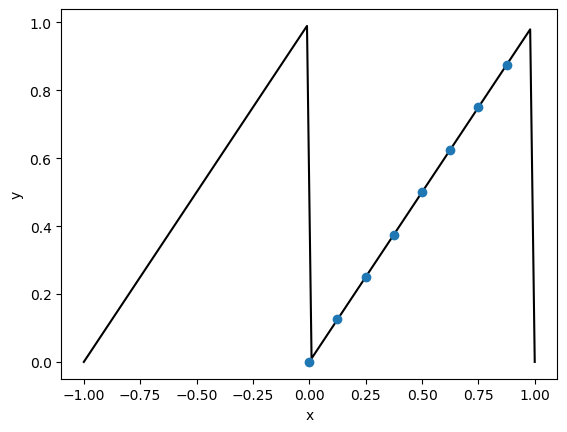

Slow DFT
[ 3.5+0.00000000e+00j -0.5+1.20710678e+00j -0.5+5.00000000e-01j
 -0.5+2.07106781e-01j -0.5-4.28626380e-16j -0.5-2.07106781e-01j
 -0.5-5.00000000e-01j -0.5-1.20710678e+00j]


SciPy FFT
[ 3.5+0.j         -0.5+1.20710678j -0.5+0.5j        -0.5+0.20710678j
 -0.5+0.j         -0.5-0.20710678j -0.5-0.5j        -0.5-1.20710678j]


In [15]:
## DFT to sawtooth; part a) (checked with scipy fft (c))

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, pi, sqrt, sum

# SciPy
import scipy.fftpack as fft

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon']   = False

# DFT function
def dft(f):
    gk=np.zeros(N, complex)
    for k in range(0,N):
        for n in range(0,N):
            gk[k]+=(f[n]*exp(-1j*((2*pi*k*n)/N)))
            #print(gk[k])

    return gk

# Sawtooth function
def sawtooth(x):
    return x - np.floor(x)


# Sample points
L      = 1.0
N      = 8
dx     = L/N
x      = np.linspace(0,L,N,endpoint=False) # endpoint=False: we don't want the endpoint in the set, but widths are the same
f      = np.zeros(N, complex)
f.real = sawtooth(x)


# Plot
Np = 100
xp = np.linspace(-L,L,Np)
yp = sawtooth(xp)
plt.figure(dpi=100)
plt.plot(xp, yp    , 'k-')
plt.plot(x , f.real, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# DFT
print('Slow DFT')
print(dft(f))
print('\n')
print('SciPy FFT')
print(fft.fft(f))

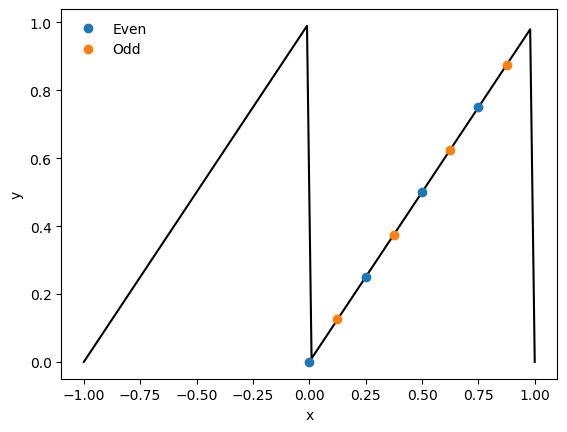

recursive FFT
[ 3.5+0.j         -0.5+1.20710678j -0.5+0.5j        -0.5+0.20710678j
 -0.5+0.j         -0.5-0.20710678j -0.5-0.5j        -0.5-1.20710678j]


Scipy FFT
[ 3.5+0.j         -0.5+1.20710678j -0.5+0.5j        -0.5+0.20710678j
 -0.5+0.j         -0.5-0.20710678j -0.5-0.5j        -0.5-1.20710678j]


In [18]:
## FFT to sawtooth; part b) (checked with scipy fft (c))

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, pi, sqrt, sum

# SciPy
import scipy.fftpack as fft

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon']   = False

# Define FFT


def fft_rec(f):
    N=len(f)
    gk=np.zeros(N, complex)
    if(N>1):
        N1=int(N/2)
        feven=np.zeros(N1, complex)
        fodd=np.zeros(N1, complex)
        
        
        for i in range(0,N1):
            feven[i]=f[2*i]
            fodd[i]=f[2*i+1]
        
        #N=int(N/2)
        Ek=fft_rec(feven)
        Ok=fft_rec(fodd)
        #this part happens after recursize bit starts to go up levels again 
        for k in range(0,N1):
            T=exp((-1j*2*pi*k)/N)
            gk[k]=Ek[k]+T*Ok[k]
            gk[k+N1]=Ek[k]-T*Ok[k]
    
    else:
        gk[0]=f[0]
    
    return gk

# Sawtooth function
def sawtooth(x):
    return x - np.floor(x)


# Sample points
L      = 1.0
N      = 8
dx     = L/N
x      = np.linspace(0,L,N,endpoint=False) # endpoint=False: we don't want the endpoint in the set, but widths are the same
f      = np.zeros(N, complex)
f.real = sawtooth(x)


# Plot
Np = 100
xp = np.linspace(-L,L,Np)
yp = sawtooth(xp)
plt.figure(dpi=100)
plt.plot(xp, yp, 'k-')
plt.plot(x[0::2], f[0::2].real, 'o', label='Even')
plt.plot(x[1::2], f[1::2].real, 'o', label='Odd')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# FFT
print('recursive FFT')
print(fft_rec(f))
print('\n')
print('Scipy FFT')
print(fft.fft(f))

### 3) 7.9 from computational physics: Image Deconvolution

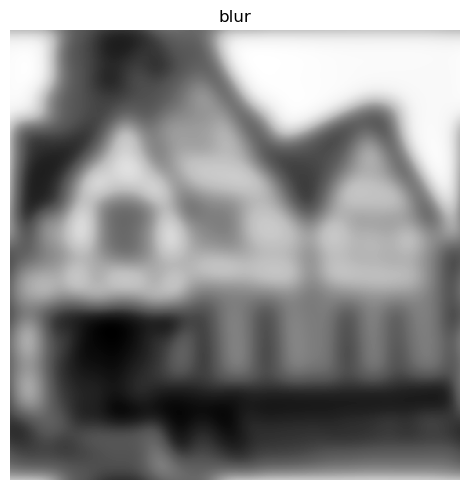

In [56]:
#part a) read in the values of 'blur.txt' and make the greyscale picture show
        #up as a density plot.

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

mpl.rcParams['legend.frameon'] = False

f=open("Desktop/Compnotes/cpresources/blur.txt",'r')
contents =f.read()
data=contents.split('\n') # 1025 indented lines but the last 1 is a false line that is empty
n=len(data)-1
data=contents.split() # 1048576 values total
m=int(len(data)/n)



W=np.zeros([n,m], dtype=float)

k=0
for j in range(0,n):
    for i in range(0,m):
        W[j,i]=data[k]
        k=k+1   
        
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)
k = ax1.imshow(W, cmap='Greys_r')
#fig.colorbar(k, ax=ax1)
#plt.ylabel('y (30,000 m)')
#plt.xlabel('x (30,000 m)')
plt.title('blur')
plt.axis('off')

fig.tight_layout()
plt.show()


1024 1024


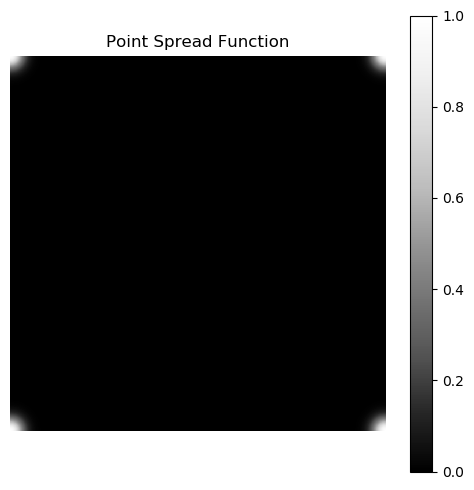

In [193]:
#b)
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

mpl.rcParams['legend.frameon'] = False

f=open("Desktop/Compnotes/cpresources/blur.txt",'r')
contents =f.read()
data=contents.split('\n') # 1025 indented lines but the last 1 is a false line that is empty
n=len(data)-1
data=contents.split() # 1048576 values total
m=int(len(data)/n)

print(n,m)

o=25   #o is σ (sigma)

def f(x,y):
    return exp(  -((x**2)+(y**2)) / (2*(o**2))  )
  
    
G=np.ones([n,m], dtype=float)


for j in range(0,int(n/2)):
    x=j
    for i in range(0,int(m/2)):
        y=i
        G[j,i]=f(x,y)
for j in range(0,int(n/2)):
    x=j
    for i in range(0,int(m/2)):
        G[j,(n-1)-i]=f(x,y)
        G[(m-1)-j,(n-1)-i]=f(x,y)
        G[(m-1)-j,i]=f(x,y)
  
        
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)
k = ax1.imshow(G, cmap='Greys_r')
fig.colorbar(k, ax=ax1)
#plt.ylabel('y (30,000 m)')
#plt.xlabel('x (30,000 m)')
plt.title('Point Spread Function')
plt.axis('off')

fig.tight_layout()
plt.show()



1024 1024


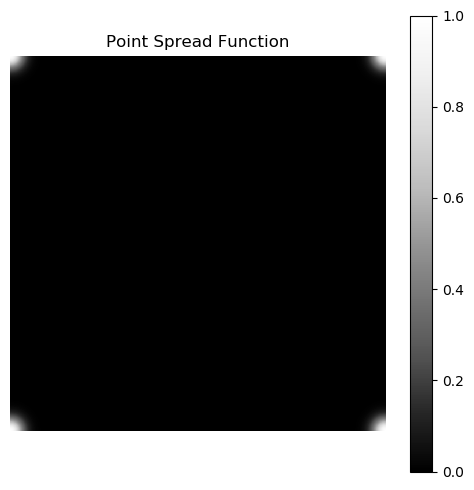

In [193]:
#b)
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

mpl.rcParams['legend.frameon'] = False

f=open("Desktop/Compnotes/cpresources/blur.txt",'r')
contents =f.read()
data=contents.split('\n') # 1025 indented lines but the last 1 is a false line that is empty
n=len(data)-1
data=contents.split() # 1048576 values total
m=int(len(data)/n)

print(n,m)

o=25   #o is σ (sigma)

def f(x,y):
    return exp(  -((x**2)+(y**2)) / (2*(o**2))  )
  
    
G=np.ones([n,m], dtype=float)


for j in range(0,n):
    if(j<n/2):
        x=j
    else:
        x=n-j
    for i in range(0,m):
        if(i<m/2):
            y=j
        else:
            y=j-m
        G[j,i]=f(x,y)

        
  
        
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)
k = ax1.imshow(G, cmap='Greys_r')
fig.colorbar(k, ax=ax1)
#plt.ylabel('y (30,000 m)')
#plt.xlabel('x (30,000 m)')
plt.title('Point Spread Function')
plt.axis('off')

fig.tight_layout()
plt.show()



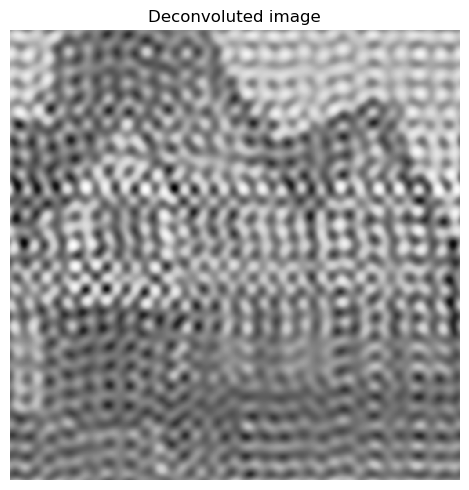

In [11]:
#part c)

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.fftpack as fft


mpl.rcParams['legend.frameon'] = False

f=open("Desktop/Compnotes/cpresources/blur.txt",'r')
contents =f.read()
data=contents.split('\n') # 1025 indented lines but the last 1 is a false line that is empty
n=len(data)-1
data=contents.split() # 1048576 values total
m=int(len(data)/n)

#part a)
W=np.zeros([n,m], dtype=float)

k=0
for j in range(0,n):
    for i in range(0,m):
        W[j,i]=data[k]
        k=k+1 
        
#part b) 
o=25   #o is σ (sigma)

def f(x,y):
    return exp(  -((x**2)+(y**2)) / (2*(o**2))   )
    
G=np.zeros([n,m], dtype=float)
for j in range(0,int(n/2)):
    x=j
    for i in range(0,int(m/2)):
        y=i
        G[j,i]=f(x,y)
        G[j,(n-1)-i]=f(x,y)
        G[(m-1)-j,(n-1)-i]=f(x,y)
        G[(m-1)-j,i]=f(x,y)
####end part b

rfW=np.fft.rfft2(W)
rfG=np.fft.rfft2(G)
a,b=rfW.shape
division=np.zeros([a,b], dtype=complex)
for i in range(0,a):
    for j in range(0,b):
        if(rfG[i,j]>10**-3):
            division[i,j]=rfW[i,j]/(rfG[i,j])
        else:
            division[i,j]=rfW[i,j]
            
#/rfG  ##this causes error probably because [we know] it's wrong 
final=np.fft.irfft2(division)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)
k = ax1.imshow(final, cmap='Greys_r')
#fig.colorbar(k, ax=ax1)

plt.title('Deconvoluted image')
plt.axis('off')

fig.tight_layout()
plt.show()




d)Bearing in mind this last point about zeros in the Fourier transform, what is it that limits our ability to deblur a photo? Why can we not perfectly unblur any photo and make it completely sharp?